<a href="https://colab.research.google.com/github/Naseem-tahir123/AI-ML/blob/main/Anomalies_Detection_using_Self_Organizing_Maps_(SOMs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# minisom library and module is used for performing self organizing maps
from minisom import MiniSom

In [ ]:
# to supress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# **Loading the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/weather_classification_data.csv')
label_encoder = LabelEncoder()

# Encode 'Cloud Cover', 'Location', and 'Season' columns
data['Cloud Cover'] = label_encoder.fit_transform(data['Cloud Cover'])
data['Season'] = label_encoder.fit_transform(data['Season'])
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,inland,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,mountain,Rainy


In [ ]:
data.shape

(13200, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.1+ MB


In [ ]:
X = data.iloc[:, 0:9].values
y = data.iloc[:, -1].values

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,14.0,73.0,9.5,82.0,3.0,1010.82,2.0,3.0,3.5
1,39.0,96.0,8.5,71.0,3.0,1011.43,7.0,1.0,10.0
2,30.0,64.0,7.0,16.0,0.0,1018.72,5.0,1.0,5.5
3,38.0,83.0,1.5,82.0,0.0,1026.25,7.0,1.0,1.0
4,27.0,74.0,17.0,66.0,2.0,990.67,1.0,3.0,2.5
...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,2.0,1003.15,1.0,2.0,1.0
13196,-1.0,76.0,3.5,23.0,1.0,1067.23,1.0,3.0,6.0
13197,30.0,77.0,5.5,28.0,2.0,1012.69,3.0,0.0,9.0
13198,3.0,76.0,10.0,94.0,2.0,984.27,0.0,3.0,2.0


In [ ]:
# data = pd.read_csv("/content/Credit_Card_Applications.csv")
# data

In [ ]:
# data.shape

In [ ]:
# data.info()

# **Defining X Variables**

In [ ]:
# # Defining X variable for the input of SOM
# X = data.iloc[:, 1:14].values
# y = data.iloc[:, -1].values

In [ ]:
# X variables
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,14.0,73.0,9.5,82.0,3.0,1010.82,2.0,3.0,3.5
1,39.0,96.0,8.5,71.0,3.0,1011.43,7.0,1.0,10.0
2,30.0,64.0,7.0,16.0,0.0,1018.72,5.0,1.0,5.5
3,38.0,83.0,1.5,82.0,0.0,1026.25,7.0,1.0,1.0
4,27.0,74.0,17.0,66.0,2.0,990.67,1.0,3.0,2.5
...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,2.0,1003.15,1.0,2.0,1.0
13196,-1.0,76.0,3.5,23.0,1.0,1067.23,1.0,3.0,6.0
13197,30.0,77.0,5.5,28.0,2.0,1012.69,3.0,0.0,9.0
13198,3.0,76.0,10.0,94.0,2.0,984.27,0.0,3.0,2.0


In [ ]:
# y variables
pd.DataFrame(y)

,0
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy
...,...
13195,Rainy
13196,Snowy
13197,Cloudy
13198,Snowy


# **Normalization**

In [ ]:
# scaling the x variables
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8
0,0.291045,0.595506,0.195876,0.752294,1.000000,0.527951,0.142857,1.000000,0.175
1,0.477612,0.853933,0.175258,0.651376,1.000000,0.529480,0.500000,0.333333,0.500
2,0.410448,0.494382,0.144330,0.146789,0.000000,0.547746,0.357143,0.333333,0.275
3,0.470149,0.707865,0.030928,0.752294,0.000000,0.566614,0.500000,0.333333,0.050
4,0.388060,0.606742,0.350515,0.605505,0.666667,0.477461,0.071429,1.000000,0.125
...,...,...,...,...,...,...,...,...,...
13195,0.261194,0.606742,0.298969,0.651376,0.666667,0.508732,0.071429,0.666667,0.050
13196,0.179104,0.629213,0.072165,0.211009,0.333333,0.669298,0.071429,1.000000,0.300
13197,0.410448,0.640449,0.113402,0.256881,0.666667,0.532637,0.214286,0.000000,0.450
13198,0.208955,0.629213,0.206186,0.862385,0.666667,0.461425,0.000000,1.000000,0.100


# **Defining the HyperParameters**

In [ ]:
# set the hyperparameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 2000
sigma = 1
learning_rate = 0.5

In [ ]:
# Define som
som = MiniSom(x = som_grid_rows, y= som_grid_columns, input_len = 9 , sigma=sigma, learning_rate = learning_rate)
# initializing the weights
som.random_weights_init(X)
# Training
som.train_random(X, iterations)

In [ ]:
# weights are
wts = som.get_weights()

In [ ]:
# Shape of weights
wts.shape

(10, 10, 9)

In [ ]:
# Returns the distance map from the weights
som.distance_map()

array([[0.30227632, 0.53052042, 0.59663182, 0.40484158, 0.33187249,
        0.29437161, 0.30788368, 0.30016927, 0.39979874, 0.227798  ],
       [0.5266139 , 0.91803878, 0.66466638, 0.87534283, 0.65543303,
        0.55183873, 0.63114664, 0.54818408, 0.69441667, 0.36106206],
       [0.62875382, 0.87075402, 0.82673479, 0.87466654, 0.78618131,
        0.63747337, 0.50582317, 0.56734353, 0.63808298, 0.56334075],
       [0.47262857, 0.79736966, 0.72121379, 1.        , 0.77301112,
        0.63308446, 0.57962858, 0.55891673, 0.6239683 , 0.45301832],
       [0.34272947, 0.57098923, 0.6937363 , 0.77506282, 0.87746548,
        0.52895801, 0.59878917, 0.43188508, 0.47336665, 0.23720873],
       [0.36937703, 0.61830496, 0.75119917, 0.85810515, 0.65791147,
        0.52495409, 0.37929983, 0.44130987, 0.35058861, 0.19090599],
       [0.32437742, 0.59577229, 0.69728667, 0.63446546, 0.57049384,
        0.42347245, 0.42374249, 0.37259935, 0.4700912 , 0.31351821],
       [0.28430611, 0.40601844, 0.4017008

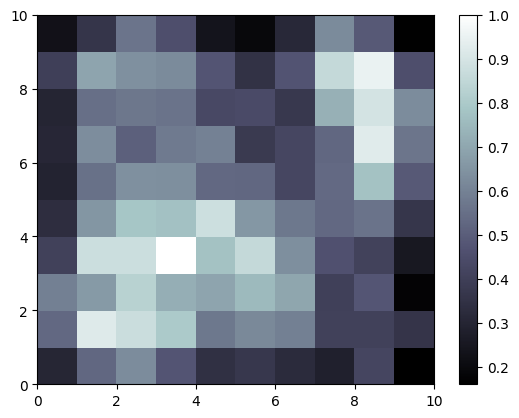

In [ ]:
from pylab import plot, pcolor, bone, show, axis, colorbar
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

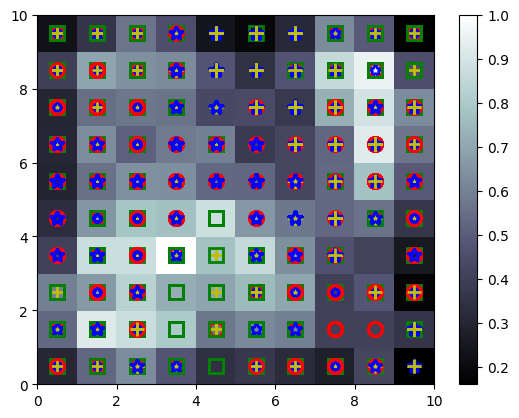

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar() # give legend

marker = ['o', 's','*','+']
colors = ['r', 'g','b','y']

label_to_index = {'Cloudy': 0, 'Sunny': 1, "Rainy":2, "Snowy":3 }
for i, x in enumerate(X):
    w = som.winner(x)
    index = label_to_index[y[i]]
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        marker[index],
        markeredgecolor = colors[index],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
    )
show()

In [ ]:
mappings = som.win_map(X)

In [ ]:
mappings

defaultdict(list,
            {(8,
              4): [array([0.29104478, 0.59550562, 0.19587629, 0.75229358, 1.        ,
                     0.52795109, 0.14285714, 1.        , 0.175     ]), array([0.34328358, 0.49438202, 0.39175258, 0.88073394, 1.        ,
                     0.51695106, 0.        , 1.        , 0.225     ]), array([0.20149254, 0.56179775, 0.35051546, 0.88073394, 1.        ,
                     0.48094415, 0.        , 1.        , 0.225     ]), array([0.14179104, 0.4494382 , 0.24742268, 0.72477064, 1.        ,
                     0.49422436, 0.07142857, 1.        , 0.1       ]), array([0.41791045, 0.4494382 , 0.1443299 , 0.74311927, 1.        ,
                     0.49540204, 0.07142857, 1.        , 0.175     ]), array([0.40298507, 0.50561798, 0.37113402, 0.83486239, 1.        ,
                     0.52767546, 0.        , 1.        , 0.25      ]), array([0.29850746, 0.47191011, 0.29896907, 0.74311927, 1.        ,
                     0.51830414, 0.21428571, 1.    

In [ ]:
mappings.keys()

dict_keys([(8, 4), (2, 4), (8, 8), (0, 2), (6, 5), (6, 0), (5, 7), (7, 4), (5, 8), (3, 3), (3, 5), (9, 9), (0, 7), (4, 8), (4, 0), (8, 0), (0, 9), (1, 7), (4, 4), (6, 9), (4, 2), (3, 7), (2, 9), (0, 8), (7, 3), (9, 1), (8, 6), (4, 1), (8, 9), (7, 5), (7, 6), (2, 0), (7, 2), (9, 8), (3, 1), (5, 5), (6, 6), (7, 7), (7, 0), (0, 4), (3, 4), (1, 6), (3, 6), (2, 7), (4, 9), (8, 5), (4, 7), (9, 5), (0, 0), (4, 6), (4, 5), (3, 9), (6, 2), (2, 5), (9, 6), (6, 8), (0, 5), (5, 4), (6, 7), (5, 9), (2, 6), (5, 6), (1, 8), (0, 1), (2, 3), (1, 9), (8, 2), (0, 6), (6, 3), (1, 3), (1, 5), (6, 4), (6, 1), (9, 7), (7, 8), (1, 4), (5, 0), (9, 4), (1, 2), (3, 2), (8, 7), (9, 2), (3, 0), (2, 1), (0, 3), (1, 0), (9, 3), (3, 8), (7, 1), (2, 8), (2, 2), (7, 9), (5, 2), (1, 1), (9, 0), (5, 3), (4, 3), (8, 1), (5, 1)])

In [ ]:
len(mappings.keys())

99

In [ ]:
mappings[(9,8)]

[array([0.34328358, 0.25842697, 0.20618557, 0.10091743, 0.        ,
        0.54947506, 0.78571429, 0.33333333, 0.3       ]),
 array([0.49253731, 0.1011236 , 0.16494845, 0.1559633 , 0.        ,
        0.52973014, 0.78571429, 0.33333333, 0.5       ]),
 array([0.45522388, 0.13483146, 0.12371134, 0.01834862, 0.        ,
        0.56636348, 0.5       , 0.33333333, 0.375     ]),
 array([0.35820896, 0.16853933, 0.07216495, 0.11009174, 0.        ,
        0.57207647, 0.5       , 0.33333333, 0.4       ]),
 array([0.44029851, 0.12359551, 0.19587629, 0.08256881, 0.        ,
        0.56283044, 0.71428571, 0.33333333, 0.275     ]),
 array([0.35820896, 0.05617978, 0.20618557, 0.13761468, 0.        ,
        0.54323586, 0.5       , 0.33333333, 0.425     ]),
 array([0.40298507, 0.15730337, 0.01030928, 0.1559633 , 0.        ,
        0.54574156, 0.71428571, 0.33333333, 0.3       ]),
 array([0.44029851, 0.12359551, 0.10309278, 0.05504587, 0.        ,
        0.53511739, 0.5       , 0.33333333, 0.35  

In [ ]:
# Taking  some of the red circular from the heat map and mapping as frauds
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

In [ ]:
frauds

array([[0.41044776, 0.07865169, 0.1443299 , ..., 0.35714286, 0.33333333,
        0.375     ],
       [0.43283582, 0.05617978, 0.08247423, ..., 0.78571429, 0.33333333,
        0.325     ],
       [0.43283582, 0.11235955, 0.19587629, ..., 0.78571429, 0.33333333,
        0.25      ],
       ...,
       [0.35074627, 0.33707865, 0.03092784, ..., 0.35714286, 0.        ,
        0.45      ],
       [0.39552239, 0.46067416, 0.10309278, ..., 0.5       , 0.        ,
        0.4       ],
       [0.48507463, 0.5505618 , 0.15463918, ..., 0.42857143, 0.        ,
        0.325     ]])

In [ ]:
frauds.shape

(441, 9)

In [ ]:
# these are two lists of customers
frauds1 = sc.inverse_transform(frauds)

In [ ]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8
0,30.0,27.0,7.0,13.0,3.0,1016.38,5.0,1.0,7.5
1,33.0,25.0,4.0,3.0,3.0,1027.60,11.0,1.0,6.5
2,33.0,30.0,9.5,7.0,3.0,1019.11,11.0,1.0,5.0
3,24.0,27.0,2.0,12.0,3.0,1015.66,7.0,1.0,6.0
4,41.0,33.0,3.5,5.0,3.0,1021.88,6.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...
436,26.0,45.0,3.5,10.0,0.0,1011.01,7.0,0.0,5.0
437,30.0,52.0,8.5,5.0,0.0,1018.21,6.0,0.0,8.0
438,22.0,50.0,1.5,10.0,0.0,1015.95,5.0,0.0,9.0
439,28.0,61.0,5.0,19.0,0.0,1027.48,7.0,0.0,8.0
